## Exploratory Data Analysis on Online Foods Store Data

#### Introduction
The data set contains information about an online food store in India, it contains demographic/location factors such as Age, Occupation, Marital status, Income. It also contains customers online behaviour such as Feedback and Output

Reference https://www.kaggle.com/datasets/sudarshan24byte/online-food-dataset


###  Problem Statement
To explore the relationship between demographic/location factors and online food ordering behavior 


### OBJECTIVES OF THE ANALYSIS

- To explore the relationship between demographic/location factors and online food ordering behavior.
- To analyze customer feedback to improve service quality,
- To potentially predict customer preferences or behavior based on demographic and location attributes.


Group 3 Members 

- Daodu Oluwatobi
- McDinna Daniel
- Collins Ugwuozor
- Ebunoluwa Adebukola

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
on_foods = pd.read_csv("C:/Users/tobid/OneDrive/Documents/Ingryd/onlinefoods.csv") # using pandas to read the csv file
on_foods 

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,Yes,Positive,Yes
384,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,Yes,Positive,Yes
385,22,Female,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,560010,Yes,Positive,Yes
386,23,Male,Single,Student,Below Rs.10000,Post Graduate,2,12.9770,77.5773,560009,Yes,Positive,Yes


In [3]:
on_foods.info() # this gives detailed information about the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
 12  Unnamed: 12                 388 non-null    object 
dtypes: float64(2), int64(3), object(8)


In [4]:
on_foods.describe() # it gives details about the numeric columns in the data set

,Age,Family size,latitude,longitude,Pin code
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,24.628866,3.280928,12.972058,77.600160,560040.113402
std,2.975593,1.351025,0.044489,0.051354,31.399609
min,18.000000,1.000000,12.865200,77.484200,560001.000000
25%,23.000000,2.000000,12.936900,77.565275,560010.750000
50%,24.000000,3.000000,12.977000,77.592100,560033.500000
75%,26.000000,4.000000,12.997025,77.630900,560068.000000
max,33.000000,6.000000,13.102000,77.758200,560109.000000


In [5]:
on_foods.isna().sum() # it returns the sum of null values for all columns

Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
Unnamed: 12                   0
dtype: int64

In [6]:
on_foods["Output"].unique() # it displays the unique values of the column

array(['Yes', 'No'], dtype=object)

In [7]:
on_foods["Feedback"].unique() # it displays the unique values of the column

array(['Positive', 'Negative '], dtype=object)

In [8]:
on_foods["Monthly Income"].value_counts() # it counts the numbers of each categories in the columns

Monthly Income
No Income          187
25001 to 50000      69
More than 50000     62
10001 to 25000      45
Below Rs.10000      25
Name: count, dtype: int64

In [9]:
on_foods["Marital Status"].unique()# it displays the unique values of the column

array(['Single', 'Married', 'Prefer not to say'], dtype=object)

In [10]:
on_foods["Marital Status"].value_counts()

Marital Status
Single               268
Married              108
Prefer not to say     12
Name: count, dtype: int64

In [11]:
on_foods['Monthly Income'].unique()# it displays the unique values of the column

array(['No Income', 'Below Rs.10000', 'More than 50000', '10001 to 25000',
       '25001 to 50000'], dtype=object)

In [30]:
# dropping a column that is unnamed, it has no discription therefore it cannot be used
columns_to_drop = ['Unnamed: 12']
on_foods.drop(columns = columns_to_drop, inplace = True )

In [31]:
on_foods.info()# this gives detailed information about the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 36.5+ KB


In [14]:
on_foods['Age'].unique() # it displays the unique valus of Age column

array([20, 24, 22, 27, 23, 21, 28, 25, 32, 30, 31, 26, 18, 19, 33, 29],
      dtype=int64)

## Univariate analysis

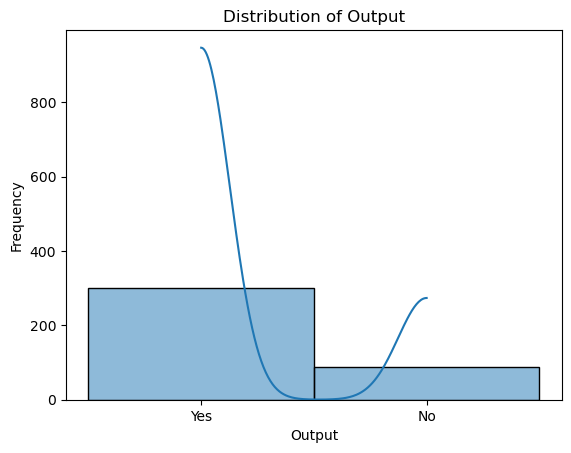

In [29]:
# Plotting a graph of output column against frequency
sns.histplot(on_foods["Output"], bins = 20, kde= True)
plt.title('Distribution of Output')
plt.xlabel('Output')
plt.ylabel('Frequency')
plt.show()

The output in this dataset indicates orders that have been delivered(YES) and orders that have not been delivered(NO) 
- Most of the orders have been delivered
- some are yet to be delivered

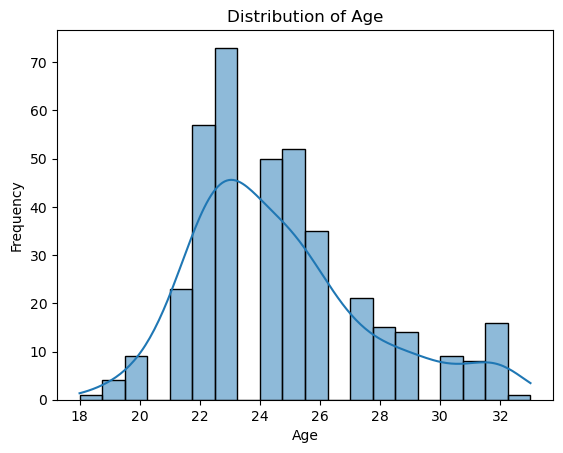

In [26]:
# Plotting a graph of Age column against Frequency
sns.histplot(on_foods["Age"], bins = 20, kde = True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

.From the above age distribution

- online orders were made frequently by young adult at age 23
- in general most orders were made from ages 22 to 25

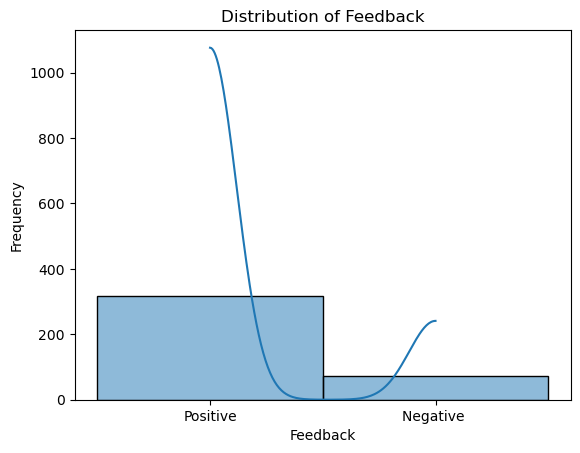

In [24]:
# Plotting a graph of Feedback column against Frequency
sns.histplot(on_foods["Feedback"], bins = 20, kde= True)
plt.title('Distribution of Feedback')
plt.xlabel('Feedback')
plt.ylabel('Frequency')
plt.show()

From the above Feedback distribution

- The feedback comment from customers were extremely positive as compared to the negative feedback

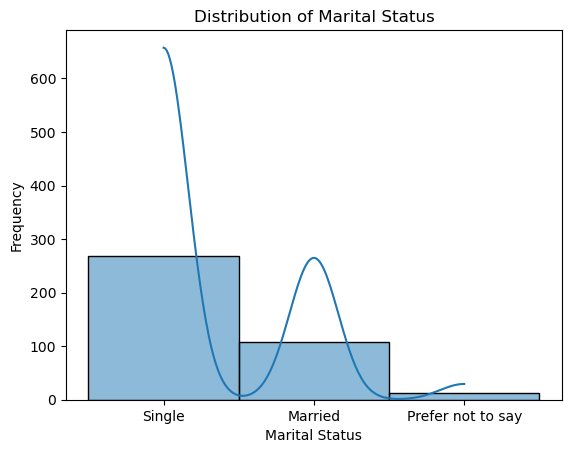

In [23]:
# Plotting a graph of Marital Status column against Frequency
sns.histplot(on_foods["Marital Status"], bins = 20, kde= True)
plt.title('Distribution of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Frequency')
plt.show()

From the above distribution of marital status 

- Singles ordered food online at a higher frequency than married and others

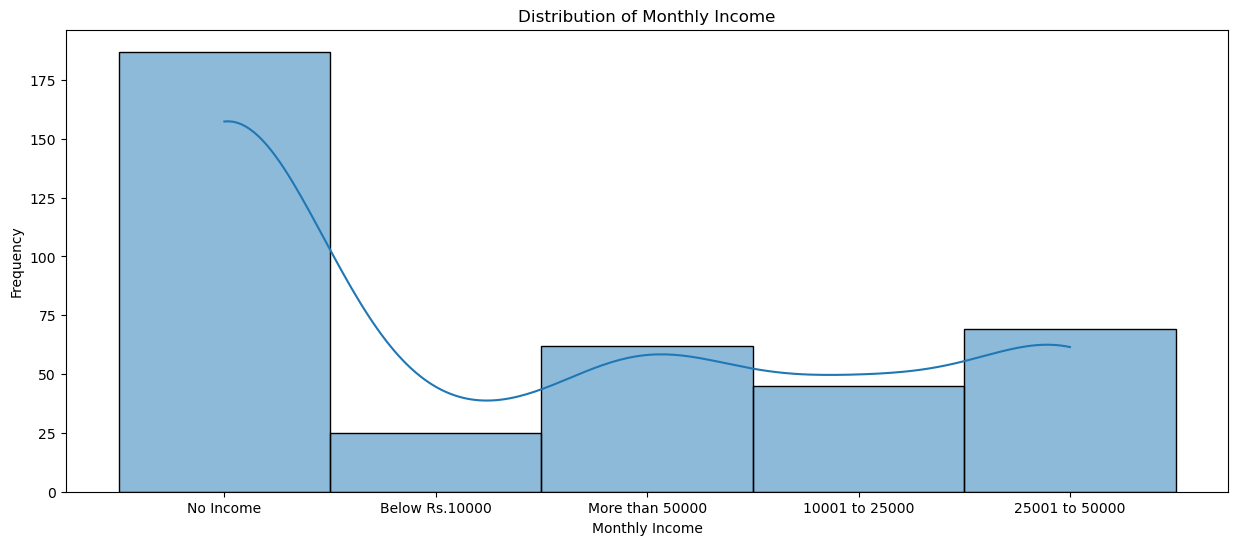

In [25]:
plt.figure(figsize = (15,6))
sns.histplot(on_foods["Monthly Income"],  bins = 20, kde = True)
plt.title('Distribution of Monthly Income')
plt.xlabel('Monthly Income')
plt.ylabel('Frequency')
plt.show()

- Most of the online food orders were made by people with no income
- The range of the order was very low among people with monthly income

## Bivariate Analysis

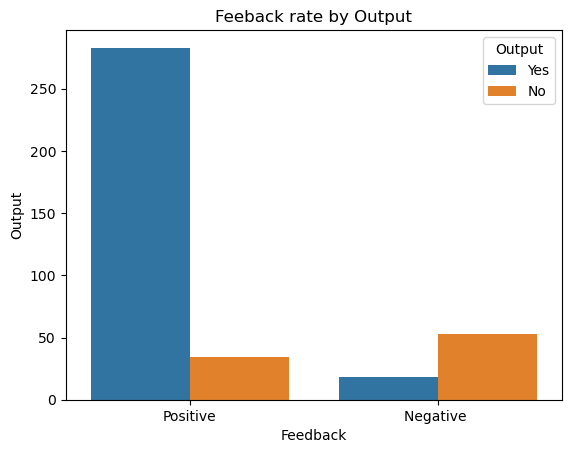

In [23]:
sns.countplot(data= on_foods, x="Feedback", hue='Output')
plt.title("Feeback rate by Output")
plt.xlabel("Feedback")
plt.ylabel('Output')
plt.show()

From the above graph
- Customers whose orders were delivered gave positive feedback
- Customers whose orders has not been delivered gave negative feedbacks
- Few of the customers whose orders were delivered gave negative feedback

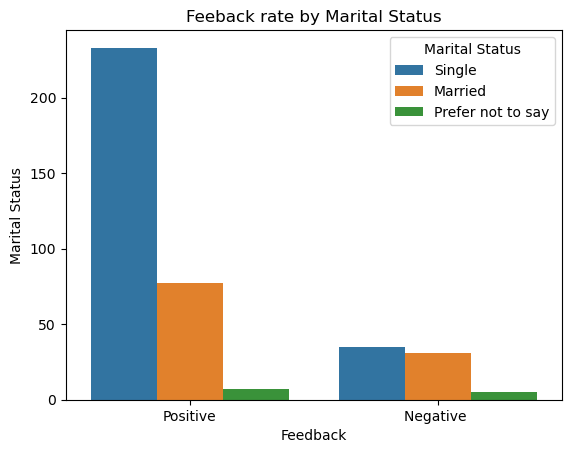

In [24]:
sns.countplot(data= on_foods, x="Feedback", hue='Marital Status')
plt.title("Feeback rate by Marital Status")
plt.xlabel("Feedback")
plt.ylabel('Marital Status')
plt.show()

- The frequecy of positive feedback was highest among singles
- The frequency of positive feedback is low among the married as compared to the singles
- Negative feedback was generally low across the marital status 


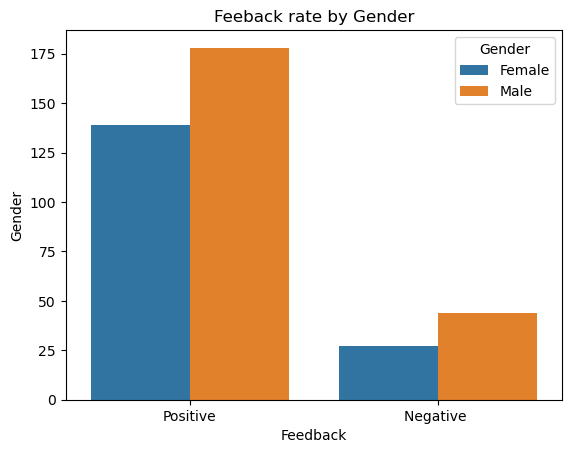

In [25]:
sns.countplot(data= on_foods, x="Feedback", hue='Gender')
plt.title("Feeback rate by Gender")
plt.xlabel("Feedback")
plt.ylabel('Gender')
plt.show()

- There were more positive feedbacks from males that ordered food online as compared to the females 
- The negative feedback was slightly higher among males than the females

In [26]:
on_foods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 36.5+ KB


In [27]:
on_foods['Occupation'].unique()

array(['Student', 'Employee', 'Self Employeed', 'House wife'],
      dtype=object)

In [28]:
on_foods['Monthly Income'].unique()

array(['No Income', 'Below Rs.10000', 'More than 50000', '10001 to 25000',
       '25001 to 50000'], dtype=object)

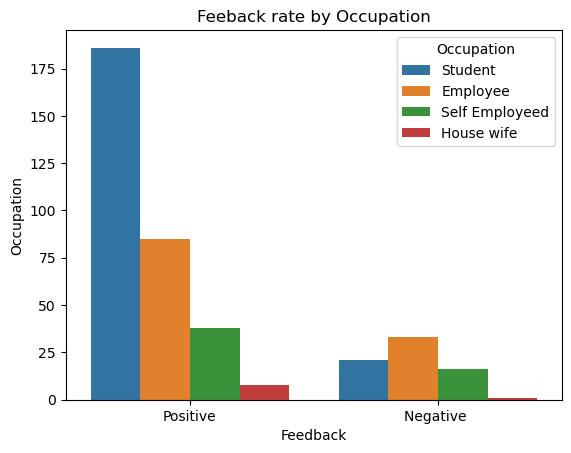

In [29]:
sns.countplot(data= on_foods, x="Feedback", hue='Occupation')
plt.title("Feeback rate by Occupation")
plt.xlabel("Feedback")
plt.ylabel('Occupation')
plt.show()

- Students gave the highest positive feedback 
- The employed group gave more negative feedback

## Correlation

In [30]:
#Correlation between thhe numerical columns of the data set
main = [ 'longitude',
              'latitude',
                'Age',
           'Family size',
           'Pin code'
           
            ]

main_corr = on_foods[main].corr()
main_corr

,longitude,latitude,Age,Family size,Pin code
longitude,1.000000,-0.144234,0.047500,0.070126,0.156119
latitude,-0.144234,1.000000,0.006595,-0.053537,-0.201813
Age,0.047500,0.006595,1.000000,0.169982,0.137294
Family size,0.070126,-0.053537,0.169982,1.000000,-0.009402
Pin code,0.156119,-0.201813,0.137294,-0.009402,1.000000


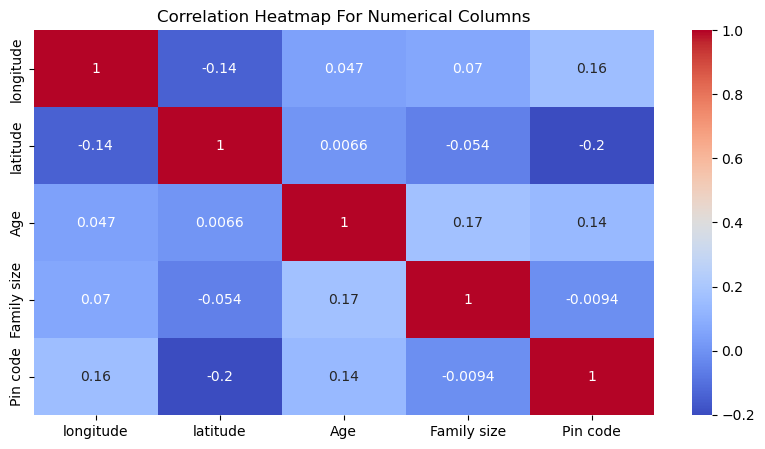

In [31]:
plt.figure(figsize=(10,5))
sns.heatmap(main_corr,
            annot=True,
            cmap='coolwarm')
plt.title('Correlation Heatmap For Numerical Columns')
plt.show()

- There are no correlation between the numerical values of the online stores

## Conclusion

- Online orders were made frequently by young adult at age 23
- In general most orders were made from ages 22 to 25

- The feedback comment from customers were extremely positive as compared to the negative feedback
- Singles ordered food online at a higher frequency than married and others

- There were more positive feedbacks from males that ordered food online as compared to the females
- The negative feedback was slightly higher among males than the females

- The frequecy of positive feedback was highest among singles
- The frequency of positive feedback is low among the married as compared to the singles
- Negative feedback was generally low across the marital status

- Customers whose orders were delivered gave positive feedback
- Customers whose orders has not been delivered gave negative feedbacks
- Few of the customers whose orders were delivered gave negative feedback





## Prediction 

- The prefrence of the customers based on feedback depends largely on the delivery of the orders made
- The customers would prefer orders to be delivered on time based on feedback